In [2]:
# import psycopg2

# con = psycopg2.connect(host = '192.168.142.226',
#                      database =  'mixer_dw', port='5432',
#                       user = 'riseplus',
#                       password = 'riseplus')

# con = psycopg2.connect(host = '192.168.142.226', port = '5432',database= 'mixer_dw',user = 'riseplus',password =  'riseplus')

In [21]:
import pandas as pd

import calendar
import datetime

In [24]:
data = pd.read_csv('data-1586242465704.csv',sep=",")
data

,name,eng_value,generation_time
0,TTH15A,19.068826,1584458136652812500
1,TTH15A,19.028340,1584458648648906250
2,TTH15A,19.068826,1584459032645000000
3,TTH15A,19.028340,1584459544652812500
4,TTH15A,18.987854,1584461848656718750
...,...,...,...
4189,TTH15A,18.259109,1579587608648906250
4190,TTH15A,18.218623,1579587864648906250
4191,TTH15A,20.483871,1585578456656718750
4192,TTH15A,20.32258064516129,1585584304656718750


In [42]:
import julian
import datetime

# s = 1584458136652889500/1000000000
s = int(data['generation_time'][1])/1000000000
d = datetime.datetime.fromtimestamp(s).strftime('%Y-%m-%d %H:%M:%S.%f')
print(d)
print(type(d))

2020-03-17 22:24:08.648906
<class 'str'>


In [39]:
print(type(data['generation_time'][1]))

print(int(data['generation_time'][1]))

<class 'numpy.int64'>
1584458648648906250


In [44]:
# convert julian date to UTC

data['UTC']=0
for i in range(len(data)):
    data['UTC'][i] = datetime.datetime.fromtimestamp(int(data['generation_time'][i])/1e9).strftime('%Y-%m-%d %H:%M:%S.%f')

data

D:\Anaconda3\envs\arima\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,name,eng_value,generation_time,UTC
0,TTH15A,19.068826,1584458136652812500,2020-03-17 22:15:36.652812
1,TTH15A,19.028340,1584458648648906250,2020-03-17 22:24:08.648906
2,TTH15A,19.068826,1584459032645000000,2020-03-17 22:30:32.645000
3,TTH15A,19.028340,1584459544652812500,2020-03-17 22:39:04.652812
4,TTH15A,18.987854,1584461848656718750,2020-03-17 23:17:28.656719
...,...,...,...,...
4189,TTH15A,18.259109,1579587608648906250,2020-01-21 13:20:08.648906
4190,TTH15A,18.218623,1579587864648906250,2020-01-21 13:24:24.648906
4191,TTH15A,20.483871,1585578456656718750,2020-03-30 21:27:36.656719
4192,TTH15A,20.32258064516129,1585584304656718750,2020-03-30 23:05:04.656719


Text(0.5, 0, 'Time')

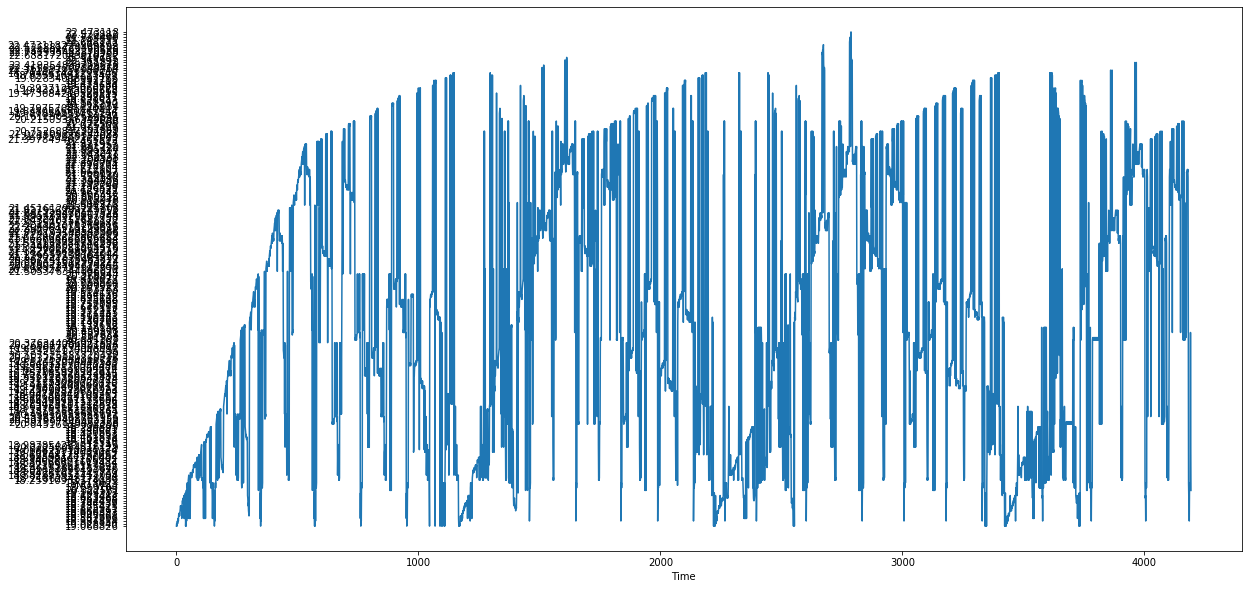

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,10))
plt.plot(data['eng_value'])
plt.xlabel('Time')